<a href="https://colab.research.google.com/github/tentax143/AWS-IGRESS/blob/main/aws_rec_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tentax143/AWS-IGRESS.git

Cloning into 'AWS-IGRESS'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 18.03 MiB | 17.13 MiB/s, done.


MultiIndex([(             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            (             'asin', ...),
            ...
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...),
            ('boughtInLastMonth', ...)],
           names=[None, 'title'], length=1291941)


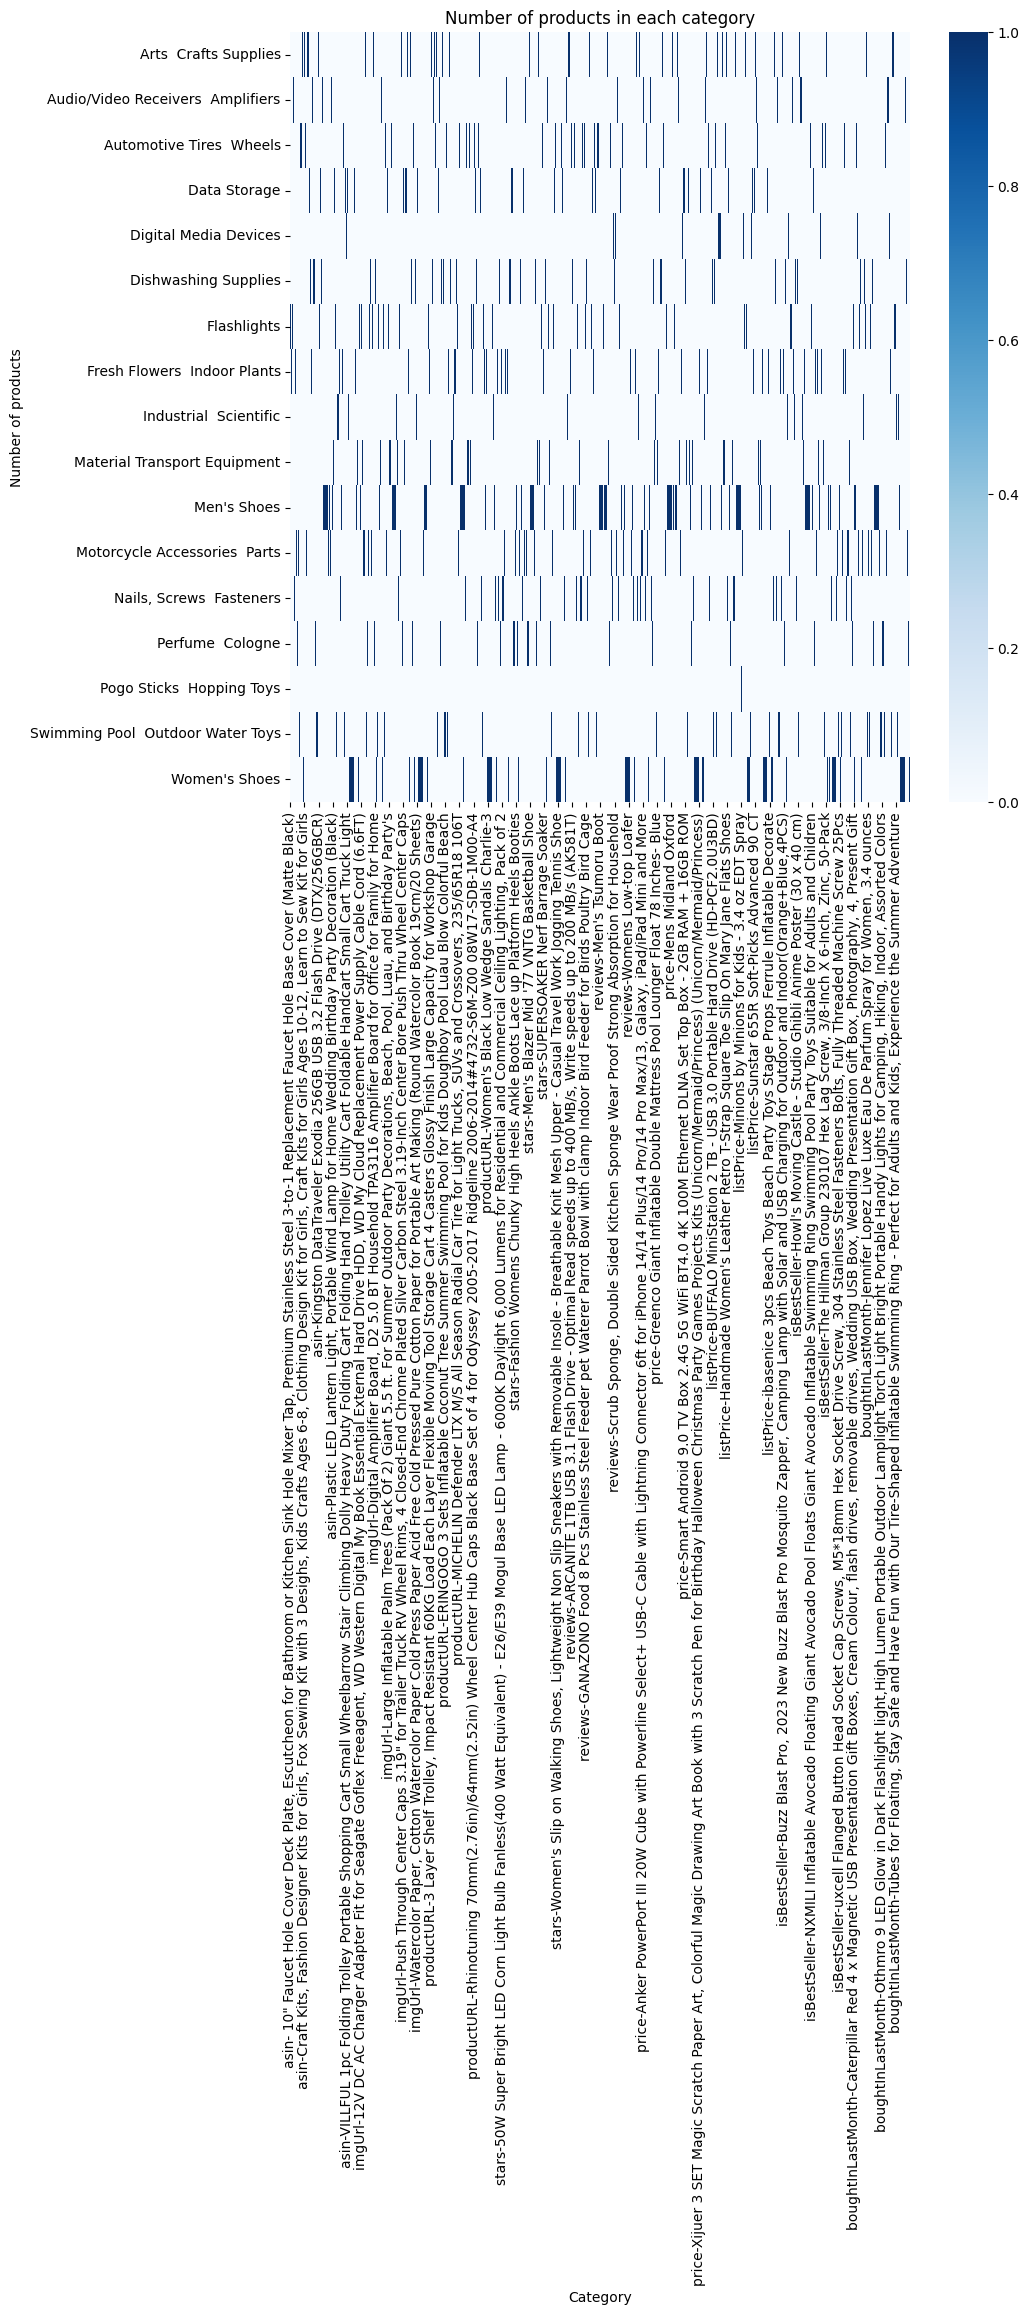

<ipython-input-9-611b993b0301>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


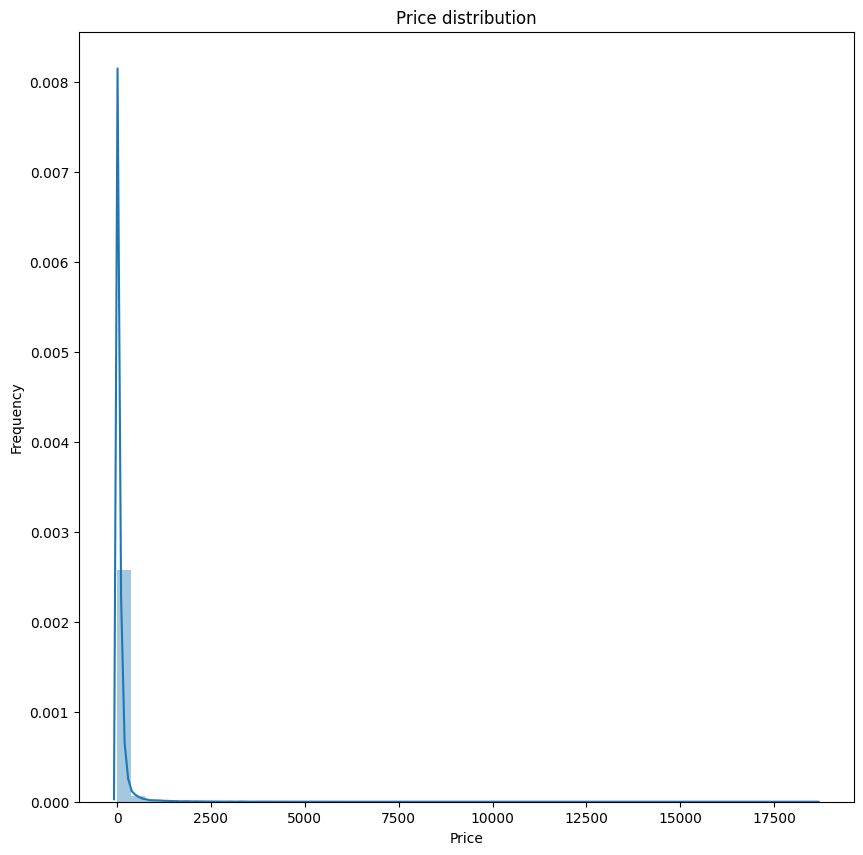

<ipython-input-9-611b993b0301>:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['isBestSeller'])


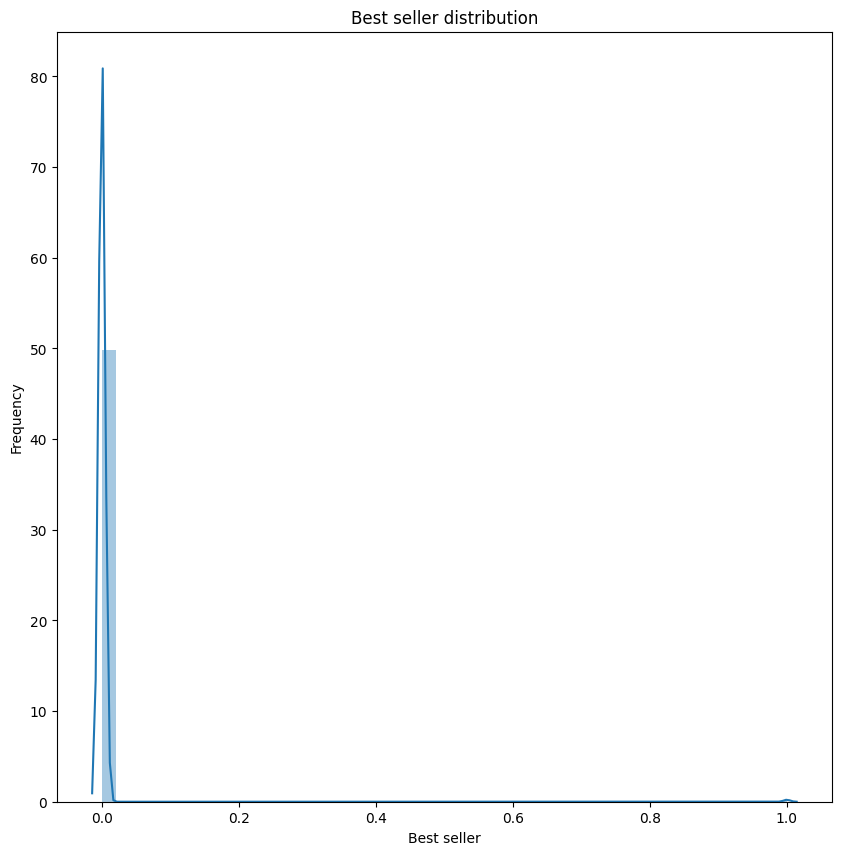

<ipython-input-9-611b993b0301>:54: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['boughtInLastMonth'])


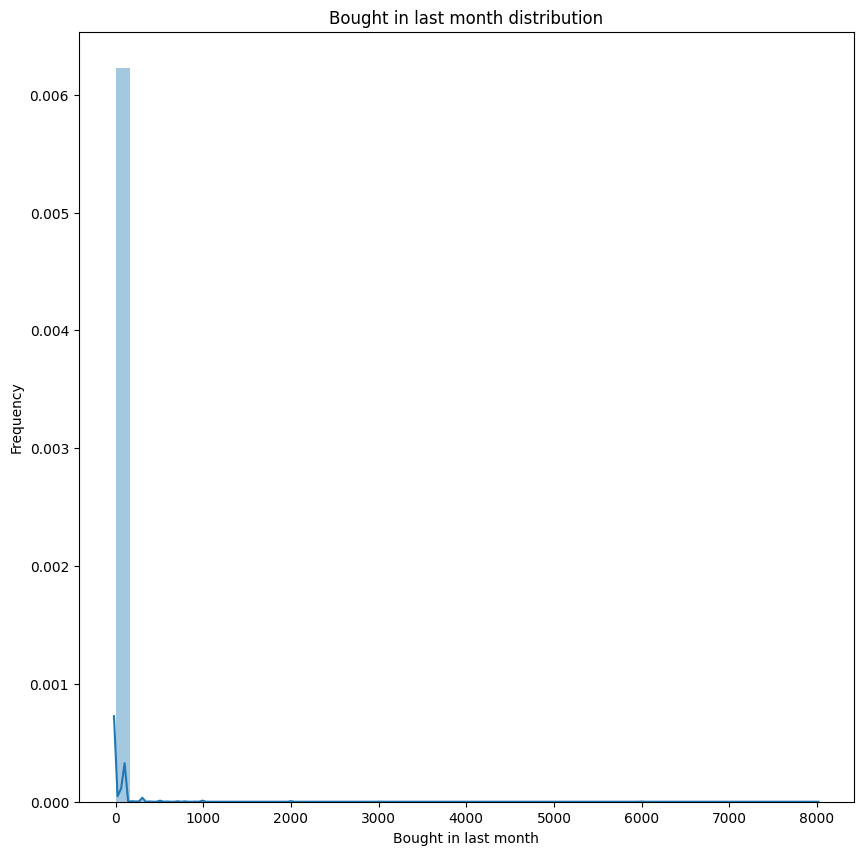

<ipython-input-9-611b993b0301>:62: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['listPrice'])


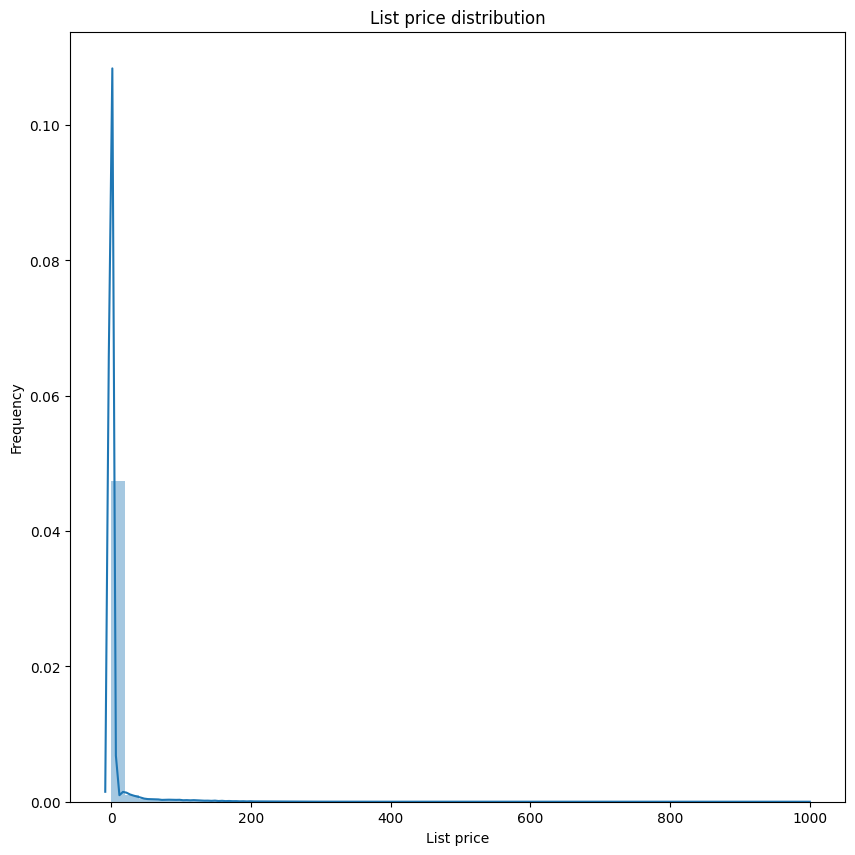

<ipython-input-9-611b993b0301>:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['reviews'])


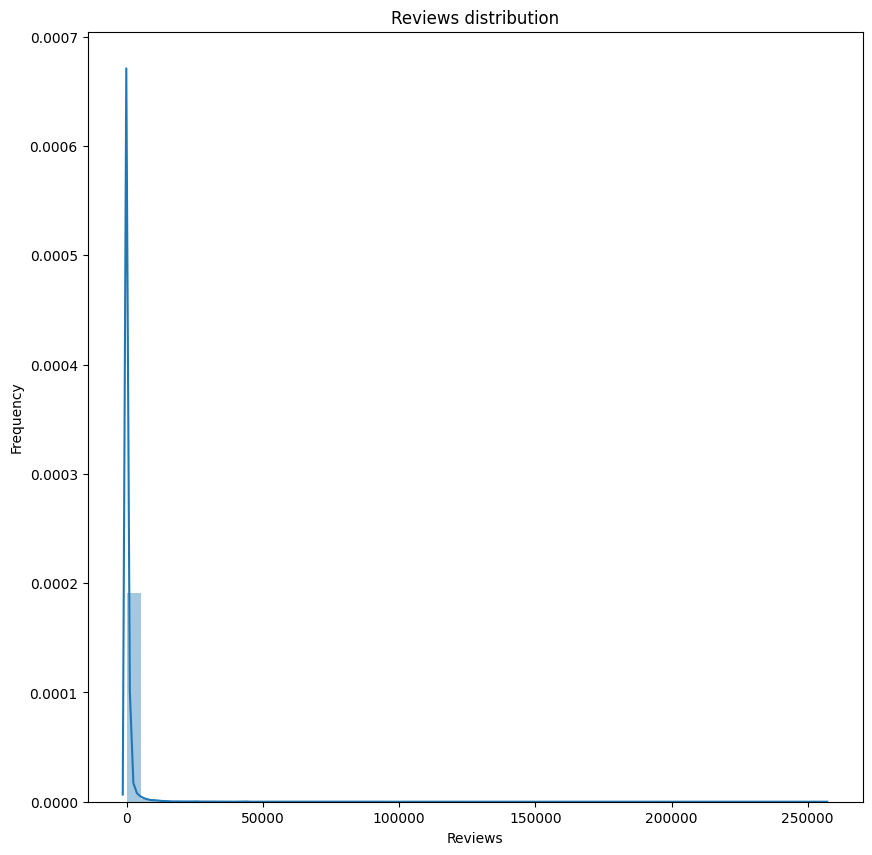

<ipython-input-9-611b993b0301>:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['stars'])


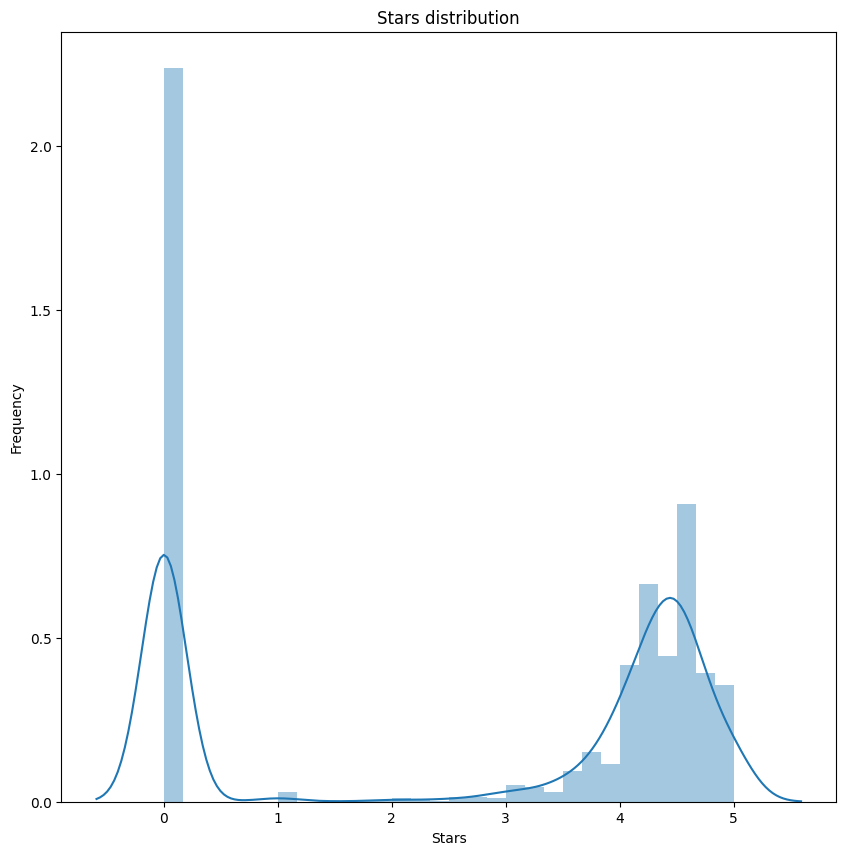

<ipython-input-9-611b993b0301>:85: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [ ]:
# prompt: make it more advance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

# Load the data
data = pd.read_csv('/content/AWS-CA-DATA (1).csv', skiprows=[21964,126699], low_memory=True)
data.drop_duplicates(subset=['categoryName', 'title'], inplace=True)

# Create a graph of the categories
plt.figure(figsize=(10, 10))
data = data.set_index(['categoryName', 'title']).unstack()

# Print the columns to inspect the names
print(data.columns)

# Create a heatmap
sns.heatmap(data.groupby('categoryName').count(), cmap='Blues', vmin=0)
plt.title('Number of products in each category')
plt.xlabel('Category')
plt.ylabel('Number of products')
plt.show()


# Create a graph of the price distribution
plt.figure(figsize=(10, 10))
sns.distplot(data['price'])
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a graph of the best seller distribution
plt.figure(figsize=(10, 10))
sns.distplot(data['isBestSeller'])
plt.title('Best seller distribution')
plt.xlabel('Best seller')
plt.ylabel('Frequency')
plt.show()

# Create a graph of the bought in last month distribution
plt.figure(figsize=(10, 10))
sns.distplot(data['boughtInLastMonth'])
plt.title('Bought in last month distribution')
plt.xlabel('Bought in last month')
plt.ylabel('Frequency')
plt.show()

# Create a graph of the list price distribution
plt.figure(figsize=(10, 10))
sns.distplot(data['listPrice'])
plt.title('List price distribution')
plt.xlabel('List price')
plt.ylabel('Frequency')
plt.show()

# Create a graph of the reviews distribution
plt.figure(figsize=(10, 10))
sns.distplot(data['reviews'])
plt.title('Reviews distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

# Create a graph of the stars distribution
plt.figure(figsize=(10, 10))
sns.distplot(data['stars'])
plt.title('Stars distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

# Create a correlation matrix
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='Blues')
plt.title('Correlation matrix')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

# Create a principal component analysis
pca = PCA(n_components=2)
pca.fit(data)
plt.figure(figsize=(10, 10))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')
plt.show()

# Create a linear regression model
model = LinearRegression()
model.fit(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']], data['categoryName'])
plt.figure(figsize=(10, 10))
plt.scatter(data['categoryName'], model.predict(data[['price', 'isBestSeller', 'bought_in_last_month', 'list_price', 'reviews', 'stars']]))
plt.xlabel('Product name')
plt.ylabel('Predicted product name')
plt.title('Linear regression model')
plt.show()

# Create a support vector machine model
model = svm.LinearSVC()
model.fit(data[['price', 'isBestseller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']], data['categoryName'])
plt.figure(figsize=(10, 10))
plt.scatter(data['categoryName'], model.predict(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']]))
plt.xlabel('Product name')
plt.ylabel('Predicted product name')
plt.title('Support vector machine model')
plt.show()

# Create a random forest model
model = RandomForestClassifier()
model.fit(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']], data['categoryName'])
plt.figure(figsize=(10, 10))
plt.scatter(data['categoryName'], model.predict(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']]))
plt.xlabel('Product name')
plt.ylabel('Predicted product name')
plt.title('Random forest model')
plt.show()

# Create a gradient boosting model
model = GradientBoostingClassifier()
model.fit(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']], data['categoryName'])
plt.figure(figsize=(10, 10))
plt.scatter(data['categoryName'], model.predict(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']]))
plt.xlabel('Product name')
plt.ylabel('Predicted product name')
plt.title('Gradient boosting model')
plt.show()

# Create a neural network model
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']], data['categoryName'], epochs=100)
plt.figure(figsize=(10, 10))
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.figure(figsize=(10, 10))
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Save the model
model.save('recommendation_system.h5')

# Load the model
model = keras.models.load_model('recommendation_system.h5')

# Make predictions
predictions = model.predict(data[['price', 'isBestSeller', 'boughtInLastMonth', 'listPrice', 'reviews', 'stars']])

# Evaluate the model
print(classification_report(data['categoryName'], predictions))
